<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#问题" data-toc-modified-id="问题-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>问题</a></span></li><li><span><a href="#过程" data-toc-modified-id="过程-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>过程</a></span><ul class="toc-item"><li><span><a href="#计算MD5哈希值字符串" data-toc-modified-id="计算MD5哈希值字符串-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>计算MD5哈希值字符串</a></span></li><li><span><a href="#测试1" data-toc-modified-id="测试1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>测试1</a></span></li><li><span><a href="#测试2" data-toc-modified-id="测试2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>测试2</a></span></li><li><span><a href="#反编译" data-toc-modified-id="反编译-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>反编译</a></span></li><li><span><a href="#破解最后一个域名" data-toc-modified-id="破解最后一个域名-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>破解最后一个域名</a></span></li></ul></li></ul></div>

# 问题
QQ访问用户浏览器历史，读取用户在某些域名下的搜索行为。一共有四个域名，此前已经知道三个

```
23, 0x1C6389BA, 0xF2FA5666, 0xF2A2E0D3, 0xC892E7BA
://S.TAOBAO.COM/SEARCH?

34, 0xB829484C, 0x520F7CC3, 0x94EC8A73, 0xD808E79
LIST.TMALL.COM/SEARCH_PRODUCT.HTM?

30, 0xDDA1029, 0x9E67F3BB, 0xB18ACC45, 0x597CF438
(未知)

21, 0x2564591C, 0x5B11347B, 0x846A0F72, 0xEF704A8
SEARCH.JD.COM/SEARCH?

作者：Lion Yang
链接：https://www.zhihu.com/question/439768601/answer/1682928251
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。
```

通过穷举中国电商网站的方法，现在已经知道此前最后一个未知的链接为

```
uland.taobao.com/sem/tbsearch?
```

# 过程

## 计算MD5哈希值字符串

In [151]:
import hashlib

def to_bytes(i32):
    b1 = i32 & 0xFF
    b2 = (i32 >> 8) & 0xFF
    b3 = (i32 >> 16) & 0xFF
    b4 = (i32 >> 24) & 0xFF
    return b1,b2,b3,b4

def to_hexstr(bs):
    return "".join(["%02x"%b for b in bs])

def fourints_to_hexstr(i1, i2, i3, i4):
    bs = to_bytes(i1) + to_bytes(i2) + to_bytes(i3) + to_bytes(i4)
    return to_hexstr(bs)
    

## 测试1

In [152]:
target = fourints_to_hexstr(0xB829484C, 0x520F7CC3, 0x94EC8A73, 0xD808E79)
print(target)

h = hashlib.md5("LIST.TMALL.COM/SEARCH_PRODUCT.HTM?".encode("UTF-16")[2:])
print(h.hexdigest())

4c4829b8c37c0f52738aec94798e800d
4c4829b8c37c0f52738aec94798e800d


## 测试2

In [153]:
target = fourints_to_hexstr(0x2564591C, 0x5B11347B, 0x846A0F72, 0xEF704A8)
print(target)

h = hashlib.md5("SEARCH.JD.COM/SEARCH?".encode("UTF-16")[2:])
print(h.hexdigest())

1c5964257b34115b720f6a84a804f70e
1c5964257b34115b720f6a84a804f70e


## 反编译

从下图可以看到，第2-4个类链接的处理方式是一样的。根据已经破解出来的信息看，第2，4类链接都是从域名的起始位置其实开始计算MD5的。（第一类链接是从://开始的。）我们猜测第三类链接也是从域名的起始位置的开始计算MD5的。

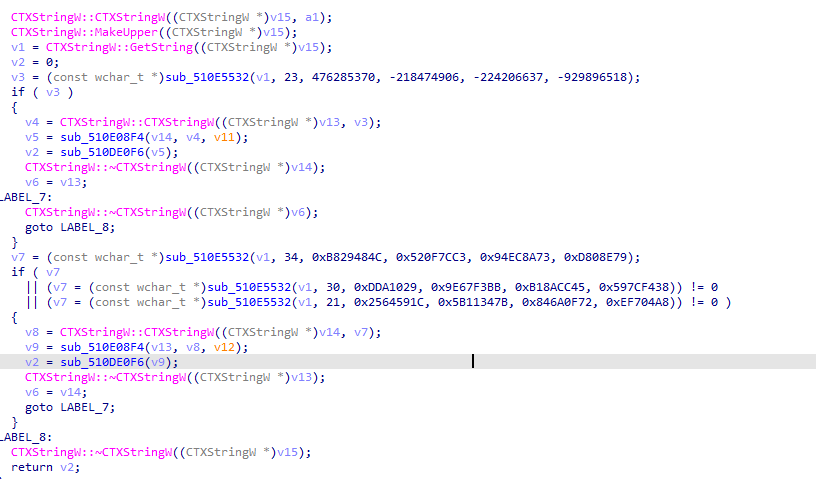

In [3]:
from IPython.display import Image
Image(filename = r'C:\Users\liangh\Pictures\decom.png')

直接看反汇编的代码可以看出，这段代码遍历了URL长度为`2*character_str_len` bytes的子区间，试图找到一个子区间它的的MD5值等于给定的四个整数。这段代码有个小缺陷，它假定了int是以小端的方式储存的，当然对于x64或者x86构架的cpu来说这是绝对正确的。

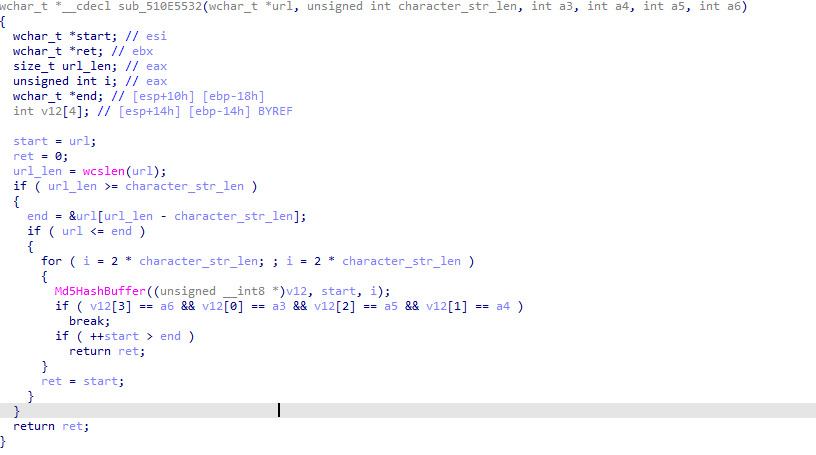

In [5]:
from IPython.display import Image
Image(filename = r'C:\Users\liangh\Pictures\md5.png')

## 破解最后一个域名

In [157]:
target = fourints_to_hexstr(0xDDA1029, 0x9E67F3BB, 0xB18ACC45, 0x597CF438)
print("target", target)

def test(s):
    s = s.upper()
    h = hashlib.md5(s.encode("UTF-16")[2:])
    print(s, len(s), h.hexdigest() == target)
    
test("s.1688.com/selloffer/offer_sea")
test("yangkeduo.com/search_result.html?")
test("www.amazon.cn/s")
test("search.suning.com/")
test("pshop.qq.com/search.shtml?")
test("search.kaola.com/search.html?")
test("category.vip.com/suggest.php?k")
test("s.weibo.com/weibo/")
test("tieba.baidu.com/f/search/res?")
test("www.zhihu.com/search?type=cont")
test("https://market.douban.com/?")
test("www.douban.com/search?")
test("search.jd.hk/Search?")
test("www.baidu.com/s?wd=")
test("mobile.yangkeduo.com/search_result.html?")
test("yangkeduo.com/search_result.ht")
test("uland.taobao.com/sem/tbsearch?")

target 2910da0dbbf3679e45cc8ab138f47c59
S.1688.COM/SELLOFFER/OFFER_SEA 30 False
YANGKEDUO.COM/SEARCH_RESULT.HTML? 33 False
WWW.AMAZON.CN/S 15 False
SEARCH.SUNING.COM/ 18 False
PSHOP.QQ.COM/SEARCH.SHTML? 26 False
SEARCH.KAOLA.COM/SEARCH.HTML? 29 False
CATEGORY.VIP.COM/SUGGEST.PHP?K 30 False
S.WEIBO.COM/WEIBO/ 18 False
TIEBA.BAIDU.COM/F/SEARCH/RES? 29 False
WWW.ZHIHU.COM/SEARCH?TYPE=CONT 30 False
HTTPS://MARKET.DOUBAN.COM/? 27 False
WWW.DOUBAN.COM/SEARCH? 22 False
SEARCH.JD.HK/SEARCH? 20 False
WWW.BAIDU.COM/S?WD= 19 False
MOBILE.YANGKEDUO.COM/SEARCH_RESULT.HTML? 40 False
YANGKEDUO.COM/SEARCH_RESULT.HT 30 False
ULAND.TAOBAO.COM/SEM/TBSEARCH? 30 True
